#### 총상태의 개수:500 (25(택시가있을수있는위치) X 5(승객의위치) X 4 (목적지의 위치)
#### action의 개수: 6개 ( 동서남북이동,승객태움,승객내림)

In [6]:
#아무행동이나 하게끔 test 실행
import gym
env = gym.make("Taxi-v3")

for _ in range(1):
    observation = env.reset()
    env.render()
    for _ in range(10):
        action = env.action_space.sample()
        observation,reward,done,info = env.step(action)
        print("action",action,"reward",reward)
        env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

action 4 reward -10
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
action 1 reward -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
action 4 reward -10
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
action 0 reward -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
action 1 reward -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
action 5 reward -10
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
action 4 reward -10
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
action 4 reward -10
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)


#### 3번예제

Success rate: 6.747
Final Q-Table Values
LEFT DOWN RIGHT UP PICKUP DROPOFF
[[ 0.          0.          0.          0.          0.          0.        ]
 [-6.71184133 -6.39731951 -6.35080704 -6.4        11.         -8.        ]
 [-4.7627264  -4.8        -5.46888704 -4.8        15.         -8.        ]
 ...
 [-2.4        -2.4064     -2.4        -3.0656     -8.         -8.        ]
 [-6.4        -6.45440881 -6.39488    -6.73679481 -8.         -8.        ]
 [ 0.         -0.8         0.         -0.8        -8.         -8.        ]]


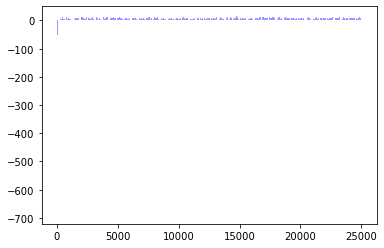

In [14]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("Taxi-v3")

Q= np.zeros([env.observation_space.n,env.action_space.n])

dis= 0.8
num_episodes=25000

rList=[]
for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False 
    
    while done != True :
        action=np.argmax(Q[state,:]+np.random.randn(1,env.action_space.n)/(i+1))
        
        new_state,reward,done,info = env.step(action)
        
        #Q[state,action] = reward + dis*np.max(Q[state,:])
        Q[state,action] += dis*((reward+(np.max(Q[new_state]))-Q[state,action]))
        
        state = new_state
        
        rAll += reward
#         print("action",action,"reward",reward)
#         env.render()
    rList.append(rAll)

print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP PICKUP DROPOFF")
print(Q)
plt.bar(range(len(rList)), rList, color='b', alpha=0.4)
plt.show()


#### 4번예제

Success rate: 2.8084
Final Q-Table Values
LEFT DOWN RIGHT UP PICKUP DROPOFF
[[ 0.          0.          0.          0.          0.          0.        ]
 [-6.31955708 -6.96690121 -7.23767027 -6.96683048  9.6220697  -9.        ]
 [-6.03809136 -5.2019039  -5.27206316 -5.2019039  14.11880599 -9.        ]
 ...
 [-3.55169094 -2.6936028  -3.55169094 -3.63838363 -9.         -9.        ]
 [-5.36597044 -6.08356797 -5.27994819 -6.12539604 -9.         -9.        ]
 [ 0.          0.          0.         -0.9         0.         -9.        ]]


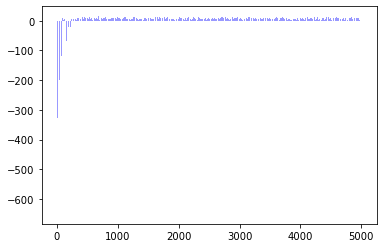

In [24]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("Taxi-v3")

Q= np.zeros([env.observation_space.n,env.action_space.n])

learning_rate=.90
dis= .99
num_episodes=5000

rList=[]
for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False 
    
    while done != True :
        action=np.argmax(Q[state,:]+np.random.randn(1,env.action_space.n)/(i+1))
        
        new_state,reward,done,info = env.step(action)
        
        #Q[state,action] = reward + dis*np.max(Q[state,:])
        Q[state, action] = (1-learning_rate) * Q[state, action] \
            + learning_rate*(reward + dis * np.max(Q[new_state, :]))
       
        rAll += reward
        state = new_state
       
    
#         print("action",action,"reward",reward)
#         env.render()
    rList.append(rAll)

print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP PICKUP DROPOFF")
print(Q)
plt.bar(range(len(rList)), rList, color='b', alpha=0.4)
plt.show()

In [7]:
import numpy as np
env = gym.make("Taxi-v3")
Q= np.zeros([env.observation_space.n,env.action_space.n])
episodes = 1
G = 0
alpha = 0.618
for epsiode in range(1,episodes+1):
    done = False
    G, reward = 0,0
    state = env.reset()
    firstState=state
    print("Initial State = {}".format(state))
    while reward != 20:
        action = np.argmax(Q[state])
        state2,reward,done,info=env.step(action)
        Q[state,action] += alpha*(reward+np.max(Q[state2]-Q[state,action]))
        G+=reward
        state = state2
        
    finalState = state
    print(finalState)

Initial State = 443
475


In [8]:
Q

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [-0.618, -0.618, -0.618, -0.618,  0.   ,  0.   ]])

#### 인터넷에서본 알수없는 예제

In [19]:
episodes=3000
G=0
alpha=0.9
rewardTracker=[]
env = gym.make("Taxi-v3")

for episode in range(1,episodes+1):
    done = False
    G, reward = 0,0
    state = env.reset()

    while done != True:
        action = np.argmax(Q[state])
        state2,reward,done,info=env.step(action)
        Q[state,action] += alpha*((reward+(np.max(Q[state2]))-Q[state,action]))
        G+=reward
        state = state2
        
    rewardTracker.append(G)    
        
    if episode%100==0:
        print('Episode {} Total Reward {}'.format(episode,G))
print("Success rate: " + str(sum(rewardTracker) / episodes))

Episode 100 Total Reward 3
Episode 200 Total Reward 8
Episode 300 Total Reward 5
Episode 400 Total Reward 10
Episode 500 Total Reward 5
Episode 600 Total Reward 5
Episode 700 Total Reward 5
Episode 800 Total Reward 7
Episode 900 Total Reward 8
Episode 1000 Total Reward 9
Episode 1100 Total Reward 3
Episode 1200 Total Reward 11
Episode 1300 Total Reward 10
Episode 1400 Total Reward 9
Episode 1500 Total Reward 10
Episode 1600 Total Reward 11
Episode 1700 Total Reward 10
Episode 1800 Total Reward 5
Episode 1900 Total Reward 7
Episode 2000 Total Reward 12
Episode 2100 Total Reward 12
Episode 2200 Total Reward 10
Episode 2300 Total Reward 6
Episode 2400 Total Reward 6
Episode 2500 Total Reward 5
Episode 2600 Total Reward 4
Episode 2700 Total Reward 8
Episode 2800 Total Reward 6
Episode 2900 Total Reward 10
Episode 3000 Total Reward 7
Success rate: 7.884666666666667


In [12]:
state = env.reset()
done =None

while done != True:
    action = np.argmax(Q[state])
    state,reward,done,info=env.step(action)
    env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R:_| : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| :_| : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : |_: : |
| : : : : |
| | : | : |
|Y|

#### 선생님답

In [28]:
import gym
env = gym.make("Taxi-v3")

In [30]:
Q=np.zeros([env.observation_space.n,env.action_space.n])

In [41]:
rList=[]
cnt=0

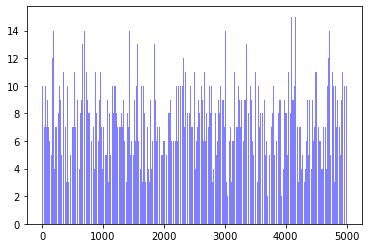

2.5


In [45]:
for episode in range(2000):
    state = env.reset()
    done=False
    G=0
    
    while done!=True:
        action = np.argmax(Q[state]) #최대값 인덱스를 리턴( 0~5)
        new_state,reward,done,_=env.step(action) #4개를 return하기때문에 변수명 4개를 준건데 뒤에쓸일이 없어서 _라 한거임
        Q[state,action]=reward + np.max(Q[new_state ])
        G+=reward
        state=new_state #움직인 상태 계쏙 알기 위해
    
    rList.append(G)
    
    if G > 0: #점수가 0보다 크면 성공이라고 했을때
        cnt+=1 #성공횟수 
        
import matplotlib.pyplot as plt
plt.bar(range(len(rList)),rList,color="b",alpha=0.5)
plt.show()

print(cnt/2000)
#학습초반에는 음수가 나오다가 점점 소수가된다.